In [ ]:
# Imports here
from google.colab import drive
import pandas as pd

from plotly.graph_objects import Table, Figure
!pip install PyWavelets
!pip install tabulate
import numpy as np
import pywt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

import plotly.graph_objects as go


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 24.0 MB/s eta 0:00:00


In [ ]:

#Define file path
drive.mount('/content/drive', force_remount=True)
file_path = '/content/drive/My Drive/Datasets/data.csv'

Mounted at /content/drive


In [ ]:
import pandas as pd
import plotly.graph_objects as go
from IPython.display import display


# Assuming file_path is defined and the CSV is loaded
data = pd.read_csv(file_path, na_values=["NA", "null", "missing"])


# Create an interactive black and white table using Plotly with simulated dashed lines
fig = go.Figure(data=[go.Table(
    header=dict(
        values=list(data.columns),
        fill_color='white',  # Set header background color to gray
        align='center',
        font=dict(color='Black', size=14, family="Arial"),
        line=dict(color='Black', width=1)  # Border for header
    ),
    cells=dict(
        values=[data[col] for col in data.columns],
        fill_color='white',  # Set cell background color to white
        align='center',
        font=dict(color='black', size=14, family="Arial"),
        line=dict(color='black', width=1)  # Simulated dashed border effect
    ))
])

# Adjust layout to make the table fill the available space
# fig.update_layout(
#     autosize=True,  # Automatically adjust the table size
#     margin=dict(t=20, b=20, l=20, r=20),  # Reduce margins
#     height=400  # Set a fixed height for the table container (adjust as needed)
# )

# Show the table
fig.show()


In [ ]:
print(data.shape)

(9000, 13)


In [ ]:
original_data = data

# Convert the 'English Date' column to datetime format
data['English Date'] = pd.to_datetime(data['English Date'])

data["Month"] = data['English Date'].dt.month
data["Year"] = data['English Date'].dt.year

columns = ['Month', 'Weekday', 'Hour', 'Festivals', 'Temperature', 'Radiation', 'Sin(360*h/24)', 'Cos(360*h/24)', 'System Down','Power(MW)'] # columns that needs to be filtered
data = data[columns]


# Create an interactive black and white table using Plotly with simulated dashed lines
fig = go.Figure(data=[go.Table(
    header=dict(
        values=list(data.columns),
        fill_color='white',  # Set header background color to gray
        align='center',
        font=dict(color='black', size=14, family="Times New Roman"),
    ),
    cells=dict(
        values=[data[col] for col in data.columns],
        fill_color='white',  # Set cell background color to white
        align='center',
        font=dict(color='black', size=14, family="Times New Roman"),
    ))
])

# Show the table
fig.show()


In [ ]:
print(data.shape)

(9000, 10)


In [ ]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go

# Load dataset


# Convert Festivals column (1 if festival, 0 otherwise)
data['Festivals'] = data['Festivals'].notna().astype(int)

# Cyclical encoding for Month
data['sin_month'] = np.sin(2 * np.pi * data['Month'] / 12).round(4)
data['cos_month'] = np.cos(2 * np.pi * data['Month'] / 12).round(4)
data.drop(columns=['Month'], inplace=True)

# Cyclical encoding for Hour
data['sin_hour'] = np.sin(2 * np.pi * data['Hour'] / 24).round(4)
data['cos_hour'] = np.cos(2 * np.pi * data['Hour'] / 24).round(4)
data.drop(columns=['Hour'], inplace=True)

# Cyclical encoding for Weekday
data['sin_weekday'] = np.sin(2 * np.pi * data['Weekday'] / 7).round(4)
data['cos_weekday'] = np.cos(2 * np.pi * data['Weekday'] / 7).round(4)
data.drop(columns=['Weekday'], inplace=True)

data.dropna()

# Convert Power(MW) to numeric and interpolate missing values
data['Power(MW)'] = pd.to_numeric(data['Power(MW)'], errors='coerce')
data['Power(MW)'] = data['Power(MW)'].interpolate(method='linear')

# Create an interactive black and white table using Plotly
fig = go.Figure(data=[go.Table(
    header=dict(
        values=list(data.columns),
        fill_color='white',
        align='center',
        font=dict(color='black', size=14, family="Arial"),
        line=dict(color='black', width=1)  # Header border
    ),
    cells=dict(
        values=[data[col] for col in data.columns],
        fill_color='white',
        align='center',
        font=dict(color='black', size=14, family="Arial"),
        line=dict(color='black', width=1)  # Simulated dashed border
    ))
])

# Show the table
fig.show()


<ipython-input-7-c9cd49d60bfd>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-7-c9cd49d60bfd>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-7-c9cd49d60bfd>:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-7-c9cd49d60

In [ ]:
import plotly.express as px

# Create scatter plot for Temperature vs Power(MW)
fig = px.scatter(data, x="Temperature", y="Power(MW)",
                 title="Scatter Plot of Temperature vs Power(MW)",
                 labels={"Temperature": "Temperature (°C)", "Power(MW)": "Power (MW)"},
                 color="Temperature",  # Color by temperature for better visualization
                 color_continuous_scale="Blues")  # Blue color scale

# Update layout for dark black title and labels
fig.update_layout(
    title_font=dict(size=18, color="black"),  # Title color and size
    xaxis_title_font=dict(size=14, color="black"),  # X-axis label color and size
    yaxis_title_font=dict(size=14, color="black")  # Y-axis label color and size
)

# Show the plot
fig.show()
# print(data.shape)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initialize scalers
feature_scaler = MinMaxScaler()  # For input features
target_scaler = MinMaxScaler()   # For target variable

# Scale input features (excluding target)
feature_columns = ['Temperature', 'Radiation', 'System Down']
data[feature_columns] = feature_scaler.fit_transform(data[feature_columns])

# Scale target variable separately
data[['Power(MW)']] = target_scaler.fit_transform(data[['Power(MW)']])
# data['Power(MW)'] = data['Power(MW)'].round(4)
data_rounded = data.round(4)

# Create an interactive black and white table using Plotly with simulated dashed lines
fig = go.Figure(data=[go.Table(
    header=dict(
        values=list(data_rounded.columns),
        fill_color='white',  # Set header background color to gray
        align='center',
        font=dict(color='Black', size=14, family="Arial"),
        line=dict(color='Black', width=1)  # Border for header
    ),
    cells=dict(
        values=[data_rounded[col] for col in data_rounded.columns],
        fill_color='white',  # Set cell background color to white
        align='center',
        font=dict(color='black', size=14, family="Arial"),
        line=dict(color='black', width=1)  # Simulated dashed border effect
    ))
])

# Show the table
fig.show()


<ipython-input-9-0baa59300583>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-9-0baa59300583>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<ipython-input-10-90b3c9cd424b>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-10-90b3c9cd424b>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-10-90b3c9cd424b>:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-10-90b3c9

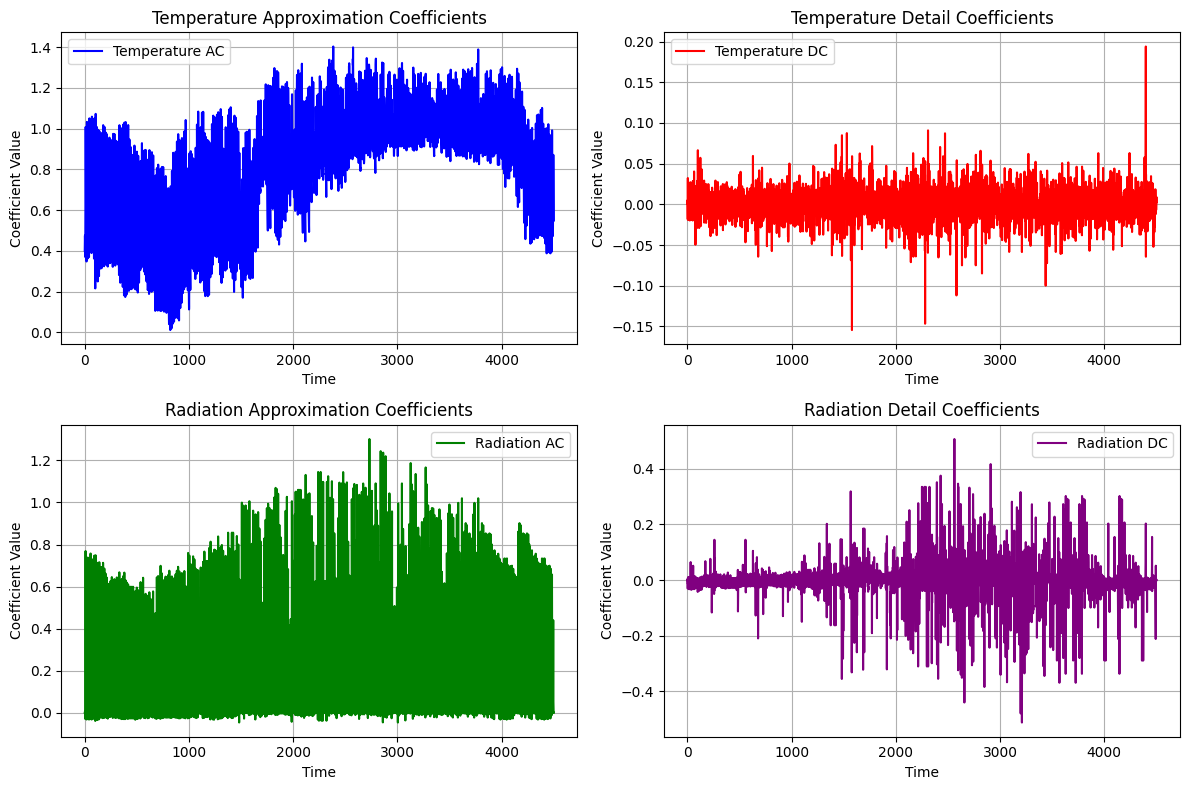

In [ ]:
import pywt
import numpy as np
import pandas as pd


# Ensure data is numeric
data['Temperature'] = pd.to_numeric(data['Temperature'], errors='coerce')
data['Radiation'] = pd.to_numeric(data['Radiation'], errors='coerce')

# Apply DWT to Temperature and Radiation
wavelet = 'db4'  # Daubechies wavelet (popular choice)
level = 1  # Level of decomposition

# Perform DWT for Temperature
coeffs_temp = pywt.wavedec(data['Temperature'], wavelet, level=level)
cA_temp, cD_temp = coeffs_temp[0], coeffs_temp[1]  # Approximation & Detail Coefficients

# Perform DWT for Radiation
coeffs_rad = pywt.wavedec(data['Radiation'], wavelet, level=level)
cA_rad, cD_rad = coeffs_rad[0], coeffs_rad[1]  # Approximation & Detail Coefficients

# Replace original values with transformed features (or keep both)
data['Temp_DWT_A'] = np.pad(cA_temp, (0, len(data) - len(cA_temp)), mode='constant')
# data['Temp_DWT_D'] = np.pad(cD_temp, (0, len(data) - len(cD_temp)), mode='constant')

data['Rad_DWT_A'] = np.pad(cA_rad, (0, len(data) - len(cA_rad)), mode='constant')
# data['Rad_DWT_D'] = np.pad(cD_rad, (0, len(data) - len(cD_rad)), mode='constant')


# cA_temp, cD_temp = pywt.dwt(data['Temperature'], 'db1')
# cA_rad, cD_rad = pywt.dwt(data['Radiation'], 'db1')

# data['Temp_DWT_A'] = pywt.idwt(cA_temp, None, 'db1')
# data['Rad_DWT_A'] = pywt.idwt(cA_rad, None, 'db1')


# Round to 4 decimal places
data['Temp_DWT_A'] = data['Temp_DWT_A'].round(4)
# data['Temp_DWT_D'] = data['Temp_DWT_D'].round(4)
data['Rad_DWT_A'] = data['Rad_DWT_A'].round(4)
# data['Rad_DWT_D'] = data['Rad_DWT_D'].round(4)

# Drop original columns if only using transformed features
data.drop(columns=['Temperature', 'Radiation', 'Sin(360*h/24)', 'Cos(360*h/24)'], inplace=True)

# Fill NaN values (if needed)
data.fillna(method='bfill', inplace=True)


# Create an interactive black and white table using Plotly with simulated dashed lines
fig = go.Figure(data=[go.Table(
    header=dict(
        values=list(data.columns),
        fill_color='white',  # Set header background color to gray
        align='center',
        font=dict(color='black', size=14, family="Arial"),
        line=dict(color='black', width=1)  # Border for header
    ),
    cells=dict(
        values=[data[col] for col in data.columns],
        fill_color='white',  # Set cell background color to white
        align='center',
        font=dict(color='black', size=14, family="Arial"),
        line=dict(color='black', width=1)  # Simulated dashed border effect
    ))
])

# Show the table
fig.show()
import matplotlib.pyplot as plt

# Create a figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Plot Temperature AC
axes[0, 0].plot(range(len(cA_temp)), cA_temp, color='blue', label="Temperature AC")
axes[0, 0].set_title("Temperature Approximation Coefficients")
axes[0, 0].set_xlabel("Time")
axes[0, 0].set_ylabel("Coefficient Value")
axes[0, 0].legend()
axes[0, 0].grid(True)

# Plot Temperature DC
axes[0, 1].plot(range(len(cD_temp)), cD_temp, color='red', label="Temperature DC")
axes[0, 1].set_title("Temperature Detail Coefficients")
axes[0, 1].set_xlabel("Time")
axes[0, 1].set_ylabel("Coefficient Value")
axes[0, 1].legend()
axes[0, 1].grid(True)

# Plot Radiation AC
axes[1, 0].plot(range(len(cA_rad)), cA_rad, color='green', label="Radiation AC")
axes[1, 0].set_title("Radiation Approximation Coefficients")
axes[1, 0].set_xlabel("Time")
axes[1, 0].set_ylabel("Coefficient Value")
axes[1, 0].legend()
axes[1, 0].grid(True)

# Plot Radiation DC
axes[1, 1].plot(range(len(cD_rad)), cD_rad, color='purple', label="Radiation DC")
axes[1, 1].set_title("Radiation Detail Coefficients")
axes[1, 1].set_xlabel("Time")
axes[1, 1].set_ylabel("Coefficient Value")
axes[1, 1].legend()
axes[1, 1].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
print(data.shape)

(9000, 11)


In [ ]:
from sklearn.model_selection import train_test_split

def create_sequences(data, sequence_length=24, prediction_length=24):
    X = []
    y = []

    # Exclude the 'Power(MW)' column from the input features
    features = data.drop(columns=['Power(MW)'])

    # Generate sequences
    for i in range(len(data) - sequence_length - prediction_length + 1):
        X.append(features.iloc[i:i+sequence_length].values)  # Use only features as input
        y.append(data.iloc[i+sequence_length:i+sequence_length+prediction_length]['Power(MW)'].values)  # Target variable for prediction

    return np.array(X), np.array(y)

# Step 7: Create sequences from the data
X, y = create_sequences(data, sequence_length=24, prediction_length=24)

# Step 8: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 9: Reshape X for the Transformer model (samples, timesteps, features)
X_train_reshaped = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2])
X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2])

# Print shapes to verify the data
print(f"X_train shape: {X_train_reshaped.shape}")
print(f"X_test shape: {X_test_reshaped.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

# The data is now ready for the model


X_train shape: (7162, 24, 10)
X_test shape: (1791, 24, 10)
y_train shape: (7162, 24)
y_test shape: (1791, 24)


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam



# Transformer Encoder Block
def transformer_encoder(inputs, head_size=128, num_heads=4, ff_dim=128, dropout=0.3):
    attention_output = layers.MultiHeadAttention(num_heads=num_heads, key_dim=head_size)(inputs, inputs)
    attention_output = layers.Dropout(dropout)(attention_output)
    attention_output = layers.LayerNormalization(epsilon=1e-6)(attention_output + inputs)  # Residual Connection

    ff_output = layers.Dense(ff_dim, activation='relu')(attention_output)
    ff_output = layers.Dense(inputs.shape[-1])(ff_output)
    encoder_output = layers.Dropout(dropout)(ff_output)
    encoder_output = layers.LayerNormalization(epsilon=1e-6)(encoder_output + attention_output)  # Residual Connection

    return encoder_output

# Transformer Decoder Block
def transformer_decoder(inputs, encoder_output, head_size=128, num_heads=4, ff_dim=128, dropout=0.3):
    self_attention_output = layers.MultiHeadAttention(num_heads=num_heads, key_dim=head_size)(inputs, inputs)
    self_attention_output = layers.Dropout(dropout)(self_attention_output)
    self_attention_output = layers.LayerNormalization(epsilon=1e-6)(self_attention_output + inputs)  # Residual

    cross_attention_output = layers.MultiHeadAttention(num_heads=num_heads, key_dim=head_size)(
        self_attention_output, encoder_output
    )
    cross_attention_output = layers.Dropout(dropout)(cross_attention_output)
    cross_attention_output = layers.LayerNormalization(epsilon=1e-6)(cross_attention_output + self_attention_output)  # Residual

    ff_output = layers.Dense(ff_dim, activation='relu')(cross_attention_output)
    ff_output = layers.Dense(inputs.shape[-1])(ff_output)
    decoder_output = layers.Dropout(dropout)(ff_output)
    decoder_output = layers.LayerNormalization(epsilon=1e-6)(decoder_output + cross_attention_output)  # Residual

    return decoder_output

# Complete Transformer Model
def transformer_model(input_shape, output_sequence_length=24, head_size=64, num_heads=4, ff_dim=128, dropout=0.3):
    inputs = layers.Input(shape=input_shape)
    encoder_output = transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout)

    # Decoder: typically during training, you'd use teacher forcing here (ground truth from previous timestep)
    decoder_inputs = layers.Input(shape=input_shape)  #  for target sequence
    decoder_output = transformer_decoder(decoder_inputs, encoder_output, head_size, num_heads, ff_dim, dropout)

    # Predict next 24 hours power consumption
    outputs = layers.Dense(1, activation='linear')(decoder_output)  # Predict one value per step
    outputs = layers.Reshape((output_sequence_length,))(outputs)  # Reshape to match y_train shape (24 steps)

    # Define the optimizer with an initial learning rate
    optimizer = Adam(learning_rate=0.00005)

    model = models.Model(inputs=[inputs, decoder_inputs], outputs=outputs)
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

    return model

# Define correct input shape
input_shape = (24, X_train_reshaped.shape[-1])  # (time_steps=24, features=11)

print(input_shape)

# Create model
model = transformer_model(input_shape, output_sequence_length=24)

# Summary

model.summary()


(24, 10)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 24, 10)         │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_attention      │ (None, 24, 10)         │         11,018 │ input_layer[0][0],     │
│ (MultiHeadAttention)      │                        │                │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_1 (Dropout)       │ (None, 24, 10)         │              0 │ multi_head_attention[… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 24, 10)         │              0 │ dropout_1[0][0],       │
│                           │                        │                │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization       │ (None, 24, 10)         │             20 │ add[0][0]              │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_1             │ (None, 24, 10)         │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 24, 128)        │          1,408 │ layer_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_attention_1    │ (None, 24, 10)         │         11,018 │ input_layer_1[0][0],   │
│ (MultiHeadAttention)      │                        │                │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 24, 10)         │          1,290 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_4 (Dropout)       │ (None, 24, 10)         │              0 │ multi_head_attention_… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_2 (Dropout)       │ (None, 24, 10)         │              0 │ dense_1[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_2 (Add)               │ (None, 24, 10)         │              0 │ dropout_4[0][0],       │
│                           │                        │                │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_1 (Add)               │ (None, 24, 10)         │              0 │ dropout_2[0][0],       │
│                           │                        │                │ layer_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_2     │ (None, 24, 10)         │             20 │ add_2[0][0]            │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_1     │ (None, 24, 10)         │             20 │ add_1[0][0]            │
│ (LayerNormalization)      │                        │                │                        │
├──────────────────────

 Total params: 38,561 (150.63 KB)

 Trainable params: 38,561 (150.63 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Define Learning Rate Scheduler
lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',  # Monitor validation loss
    factor=0.5,          # Reduce LR by a factor of 0.5
    patience=5,          # Wait for 5 epochs before reducing LR
    min_lr=1e-6          # Minimum possible LR
)

# The model expects inputs of shape (None, 24, 11)
history = model.fit([X_train_reshaped, X_train_reshaped], y_train,  # Input to decoder will be same as encoder for training
                    validation_data=([X_test_reshaped, X_test_reshaped], y_test),  # Same for validation
                    epochs=45, batch_size=128, verbose=1, callbacks=[lr_scheduler])

Epoch 1/45
56/56 ━━━━━━━━━━━━━━━━━━━━ 23s 211ms/step - loss: 2.6536 - mae: 1.3580 - val_loss: 1.4175 - val_mae: 0.9910 - learning_rate: 5.0000e-05
Epoch 2/45
56/56 ━━━━━━━━━━━━━━━━━━━━ 10s 183ms/step - loss: 1.3773 - mae: 0.9607 - val_loss: 0.8210 - val_mae: 0.7556 - learning_rate: 5.0000e-05
Epoch 3/45
56/56 ━━━━━━━━━━━━━━━━━━━━ 11s 189ms/step - loss: 0.9170 - mae: 0.7752 - val_loss: 0.5410 - val_mae: 0.6108 - learning_rate: 5.0000e-05
Epoch 4/45
56/56 ━━━━━━━━━━━━━━━━━━━━ 21s 209ms/step - loss: 0.6932 - mae: 0.6678 - val_loss: 0.3780 - val_mae: 0.5083 - learning_rate: 5.0000e-05
Epoch 5/45
56/56 ━━━━━━━━━━━━━━━━━━━━ 20s 199ms/step - loss: 0.5522 - mae: 0.5919 - val_loss: 0.2749 - val_mae: 0.4313 - learning_rate: 5.0000e-05
Epoch 6/45
56/56 ━━━━━━━━━━━━━━━━━━━━ 10s 185ms/step - loss: 0.4572 - mae: 0.5346 - val_loss: 0.2068 - val_mae: 0.3724 - learning_rate: 5.0000e-05
Epoch 7/45
56/56 ━━━━━━━━━━━━━━━━━━━━ 22s 218ms/step - loss: 0.3831 - mae: 0.4872 - val_loss: 0.1590 - val_mae: 0.3249

In [ ]:
# Assuming X_test is the encoder input (e.g., last 24 hours of data for each sample)
# decoder_input_test is typically the same as X_test for autoregressive predictions, but you can customize it

# Initialize decoder_input_test (same as X_test for simplicity in this case)
decoder_input_test = X_test  # Or use last known values if using autoregressive approach

# Predict the next 24 hours load using the trained model
predictions = model.predict([X_test, decoder_input_test])

# predictions will have shape (num_samples, 24), where 24 is the predicted load for the next 24 hours
print(predictions)


56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step
[[0.5691013  0.53120345 0.486162   ... 0.60294443 0.5965982  0.5788126 ]
 [0.52657163 0.4999119  0.47589913 ... 0.5403518  0.52330655 0.49968043]
 [0.5873466  0.57899135 0.5591975  ... 0.5248383  0.5325797  0.5465101 ]
 ...
 [0.6190633  0.63218206 0.64191467 ... 0.5385195  0.563331   0.5803011 ]
 [0.44111755 0.38606587 0.33662477 ... 0.5780712  0.5428509  0.4960284 ]
 [0.5160799  0.53049767 0.521625   ... 0.39647526 0.44133687 0.4764394 ]]


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Inverse transform the predictions and actual values
y_test_inv = target_scaler.inverse_transform(y_test)  # Convert back to MW
y_pred_inv = target_scaler.inverse_transform(predictions)  # Convert back to MW

print(y_test_inv.shape)
print(y_pred_inv.shape)

# RMSE
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))

# MAE
mae = mean_absolute_error(y_test_inv, y_pred_inv)
# MAPE (Handling division by zero)
nonzero_indices = y_test_inv > 1e-5  # Filter out near-zero values
mape = np.mean(np.abs((y_test_inv[nonzero_indices] - y_pred_inv[nonzero_indices]) / y_test_inv[nonzero_indices])) * 100

# R² Score
r2 = r2_score(y_test_inv, y_pred_inv)

print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"MAPE: {mape:.4f}%")
print(f"R² Score: {r2:.4f}")


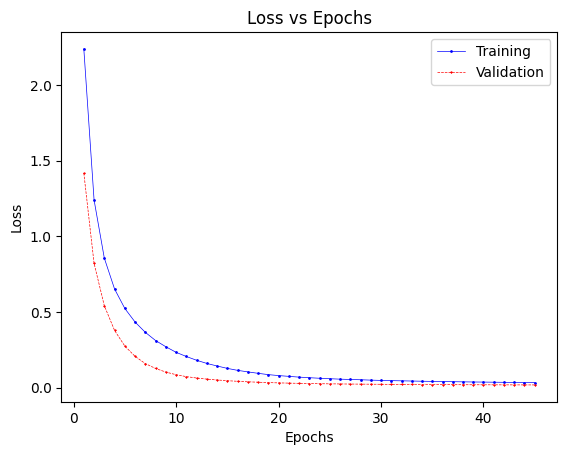

In [ ]:
# Loss vs Epochs
import matplotlib.pyplot as plt

train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the training and validation loss
epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, label='Training',color='blue', linestyle='-', marker = "o",markersize=1,linewidth = 0.5)
plt.plot(epochs, val_loss, label='Validation',color='red', linestyle='--', marker = "*",markersize=1,linewidth = 0.5)
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()